<a href="https://colab.research.google.com/github/Prasadkurapati/Deep-learning-1/blob/main/ADV_MODELS_OF_DEEP_LEARNING_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import os

import numpy as np
from PIL import Image
import pandas as pd

import torch
from torch.utils.data import Dataset, DataLoader , Subset
from torchvision import transforms
from torchvision.datasets import MNIST


import matplotlib.pyplot as plt
import seaborn as sn


from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Problem 1 Part 1

## Load 4 image Data

In [2]:
!mkdir -p data
!mkdir -p data/train

!wget -O data/train/img_0.jpg -nc -q https://github.com/darksigma/Fundamentals-of-Deep-Learning-Book/raw/master/ch05_implementing_nn_pytorch/data/train/img_0.jpg
!wget -O data/train/img_1.jpg -nc -q https://github.com/darksigma/Fundamentals-of-Deep-Learning-Book/raw/master/ch05_implementing_nn_pytorch/data/train/img_1.jpg
!wget -O data/train/img_2.jpg -nc -q https://github.com/darksigma/Fundamentals-of-Deep-Learning-Book/raw/master/ch05_implementing_nn_pytorch/data/train/img_2.jpg
!wget -O data/train/img_3.jpg -nc -q https://github.com/darksigma/Fundamentals-of-Deep-Learning-Book/raw/master/ch05_implementing_nn_pytorch/data/train/img_3.jpg
!wget -O data/train/labels.npy -nc -q https://github.com/darksigma/Fundamentals-of-Deep-Learning-Book/raw/master/ch05_implementing_nn_pytorch/data/train/labels.npy

In [3]:
class ImageDataset(Dataset):
  def __init__(self, img_dir, label_file):
    super(ImageDataset, self).__init__()
    self.img_dir = img_dir
    self.labels = torch.tensor(np.load(label_file, allow_pickle=True))
    self.transforms = transforms.ToTensor()

  def __getitem__(self, idx):
    img_pth = os.path.join(self.img_dir, "img_{}.jpg".format(idx))
    img = Image.open(img_pth)
    img = self.transforms(img).flatten()
    label = self.labels[idx]
    return {"data":img, "label":label}

  def __len__(self):
    return len(self.labels)

In [4]:
train_dataset = ImageDataset(img_dir='./data/train/',
                             label_file='./data/train/labels.npy')

train_loader = DataLoader(train_dataset,
                          batch_size=4,
                          shuffle=True)

In [5]:
for minibatch in train_loader:
  data, labels = minibatch['data'], minibatch['label']
  print(data)
  print(labels)

tensor([[0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.]])
tensor([0, 1, 4, 2])


In [6]:
print(data.shape)

torch.Size([4, 784])


In [7]:
ndata=data.view(4,28,28).detach().numpy()

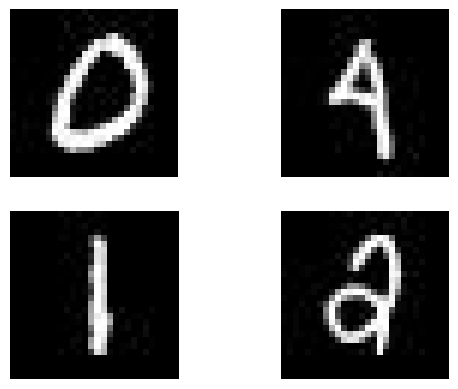

In [8]:
_,axes = plt.subplots(2,2)
for i in range(2):
  axes[i][0].imshow(ndata[i],cmap='gray')
  axes[i][1].imshow(ndata[i+2],cmap='gray')
  axes[i][0].axis('off')
  axes[i][1].axis('off')

## Create Dataframe

In [9]:
reshaped_data = ndata.reshape(4, 784)
df = pd.DataFrame(reshaped_data)
df['class'] = labels

In [10]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,class
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.023529,...,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.035294,0.000000,...,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,1
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.011765,0.003922,...,0.019608,0.0,0.015686,0.003922,0.003922,0.0,0.0,0.0,0.0,4
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.019608,0.000000,...,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,2


In [11]:
X = df.drop("class",axis=1).values
X = StandardScaler().fit_transform(X)

## PCA Version 1

In [12]:
pca_mnist_v1 = PCA(n_components=2)
pc_mnist_v1 = pca_mnist_v1.fit_transform(X)

In [13]:
principal_mnist_df_v1 = pd.DataFrame(data = pc_mnist_v1, columns = ['principal component 1', 'principal component 2'])


In [14]:
principal_mnist_df_v1.head()

,principal component 1,principal component 2
0,24.503990,-5.978615
1,-11.013918,-6.277756
2,-12.096301,-8.824053
3,-1.393767,21.080423


In [15]:
for i in range(len(pca_mnist_v1.explained_variance_ratio_)):
  print('Explained variability for  principal component{} = {}'.format(i,pca_mnist_v1.explained_variance_ratio_[i]))

print('\nTotal Explained variability of components = {}'.format(sum(pca_mnist_v1.explained_variance_ratio_)))


Explained variability for  principal component0 = 0.4550286829471588
Explained variability for  principal component1 = 0.3124488592147827

Total Explained variability of components = 0.7674775421619415


In [16]:
principal_mnist_df_v1['class'] = df['class']

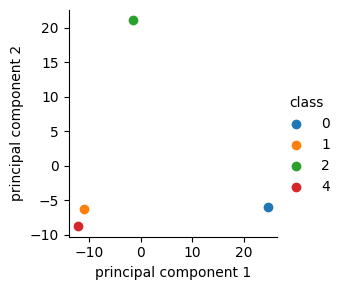

In [17]:
sn.FacetGrid(principal_mnist_df_v1, hue="class").map(plt.scatter, 'principal component 1', 'principal component 2').add_legend()
plt.show()

## PCA Version 2

In [18]:
pca_mnist_v2 = PCA(n_components=0.99, svd_solver='auto')
pc_mnist_v2 = pca_mnist_v2.fit_transform(X)

In [19]:
columns = ["principal component "+str(i) for i in range(pc_mnist_v2.shape[1])]

In [20]:
principal_mnist_df_v2 = pd.DataFrame(data = pc_mnist_v2, columns = columns)

In [21]:
principal_mnist_df_v2.head()

,principal component 0,principal component 1,principal component 2
0,24.503986,-5.978630,0.074822
1,-11.013939,-6.277784,-15.560184
2,-12.096305,-8.824017,14.167610
3,-1.393750,21.080446,1.317766


In [22]:
for i in range(len(pca_mnist_v2.explained_variance_ratio_)):
  print('Explained variability for  principal component{} = {}'.format(i,pca_mnist_v2.explained_variance_ratio_[i]))

print('\nTotal Explained variability of components = {}'.format(sum(pca_mnist_v2.explained_variance_ratio_)))


Explained variability for  principal component0 = 0.4550287127494812
Explained variability for  principal component1 = 0.3124491274356842
Explained variability for  principal component2 = 0.2325221747159958

Total Explained variability of components = 1.0000000149011612


## Manual Eigen Value Calculation

In [23]:
X = df.drop("class",axis=1).values

In [24]:
X_mean = X.mean(axis=0)
X_std = X.std(axis=0)

For some of the columns STD was zero for normalization was giving an error

`<ipython-input-48-5f9d27351a77>:1: RuntimeWarning: invalid value encountered in divide
  X_Normalized = (X - X.mean(axis=0)) / X.std(axis=0)`

  so change the code to replace **std by 1 if its value is 0**

In [25]:
# Avoid division by zero by replacing zeros in the standard deviation
X_std_safe = np.where(X_std == 0, 1, X_std)

X_standardized = (X - X_mean) / X_std_safe

In [26]:
covariance_matrix = np.cov(X_standardized, ddof = 1, rowvar = False)

In [27]:
covariance_matrix.shape

(784, 784)

In [28]:
eigenvalues, eigenvectors = np.linalg.eig(covariance_matrix)

In [29]:
# np.argsort can only provide lowest to highest; use [::-1] to reverse the list
order_of_importance = np.argsort(eigenvalues)[::-1]

# utilize the sort order to sort eigenvalues and eigenvectors
sorted_eigenvalues = eigenvalues[order_of_importance]
sorted_eigenvectors = eigenvectors[:,order_of_importance] # sort the columns

In [30]:
sorted_eigenvalues.shape

(784,)

In [31]:
explained_variance = sorted_eigenvalues / np.sum(sorted_eigenvalues)

In [32]:
k = 2 # select the number of principal components
reduced_data = np.matmul(X_standardized, sorted_eigenvectors[:,:k]) # transform the original data


In [33]:
total_explained_variance = sum(explained_variance[:k])

In [34]:
for i in range(len(explained_variance[:k])):
  print('Explained variability for  principal component{} = {}'.format(i,explained_variance[:k][i].real))

print('\nTotal Explained variability of components = {}'.format(total_explained_variance.real))


Explained variability for  principal component0 = 0.4550287893238577
Explained variability for  principal component1 = 0.31244898006247923

Total Explained variability of components = 0.7674777693863369


## How is it obtained a) and b) vs c)

1. a) 0.7674
2. b) 1.0
3. c) 0.7674

# Problem 1 part 2

## Load Dataset

In [35]:
test_dataset = MNIST(".", train=False,
                     download=True, transform=transforms.ToTensor())

test_loader = DataLoader(test_dataset,
                         batch_size=64, shuffle=False)

Failed to download (trying next):
HTTP Error 404: Not Found



100%|██████████| 9.91M/9.91M [00:02<00:00, 4.11MB/s]


Extracting ./MNIST/raw/train-images-idx3-ubyte.gz to ./MNIST/raw

Failed to download (trying next):
HTTP Error 404: Not Found



100%|██████████| 28.9k/28.9k [00:00<00:00, 135kB/s]


Extracting ./MNIST/raw/train-labels-idx1-ubyte.gz to ./MNIST/raw

Failed to download (trying next):
HTTP Error 404: Not Found



100%|██████████| 1.65M/1.65M [00:06<00:00, 246kB/s]


Extracting ./MNIST/raw/t10k-images-idx3-ubyte.gz to ./MNIST/raw

Failed to download (trying next):
HTTP Error 404: Not Found



100%|██████████| 4.54k/4.54k [00:00<00:00, 5.22MB/s]

Extracting ./MNIST/raw/t10k-labels-idx1-ubyte.gz to ./MNIST/raw



In [36]:
# subset to simplify the extraction of 2500 random samples
subset_indices = np.random.choice(range(len(test_dataset)), 2500, replace=False)
test_subset = Subset(test_dataset, subset_indices)

In [37]:
from torch.utils.data import Dataset, random_split
length = len(test_dataset)

test_data, _ = random_split(test_dataset, [int(length/4), length - int(length/4)], torch.Generator().manual_seed(42))

In [38]:
# flatten the images and extract the labels
largedata = np.array([test_subset[i][0].numpy().reshape(-1) for i in range(len(test_subset))])
labels = np.array([test_subset[i][1] for i in range(len(test_subset))])

## Create Dataframe

In [39]:
reshaped_data = largedata.reshape(-1, 784)
df = pd.DataFrame(reshaped_data)
df['class'] = labels

In [40]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,class
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7


In [41]:
X = df.drop("class",axis=1).values
X = StandardScaler().fit_transform(X)

## PCA Version 1

In [42]:
pca_mnist_v1 = PCA(n_components=2)
pc_mnist_v1 = pca_mnist_v1.fit_transform(X)

In [43]:
principal_mnist_df_v1 = pd.DataFrame(data = pc_mnist_v1, columns = ['principal component 1', 'principal component 2'])


In [44]:
principal_mnist_df_v1.head()

,principal component 1,principal component 2
0,-1.847722,7.818232
1,-5.904900,-6.596622
2,0.871783,5.974232
3,-3.257596,-9.182372
4,-6.818624,7.565839


In [45]:
for i in range(len(pca_mnist_v1.explained_variance_ratio_)):
  print('Explained variability for  principal component{} = {}'.format(i,pca_mnist_v1.explained_variance_ratio_[i]))

print('\nTotal Explained variability of components = {}'.format(sum(pca_mnist_v1.explained_variance_ratio_)))


Explained variability for  principal component0 = 0.06656496971845627
Explained variability for  principal component1 = 0.04571016877889633

Total Explained variability of components = 0.1122751384973526


In [46]:
principal_mnist_df_v1['class'] = df['class']

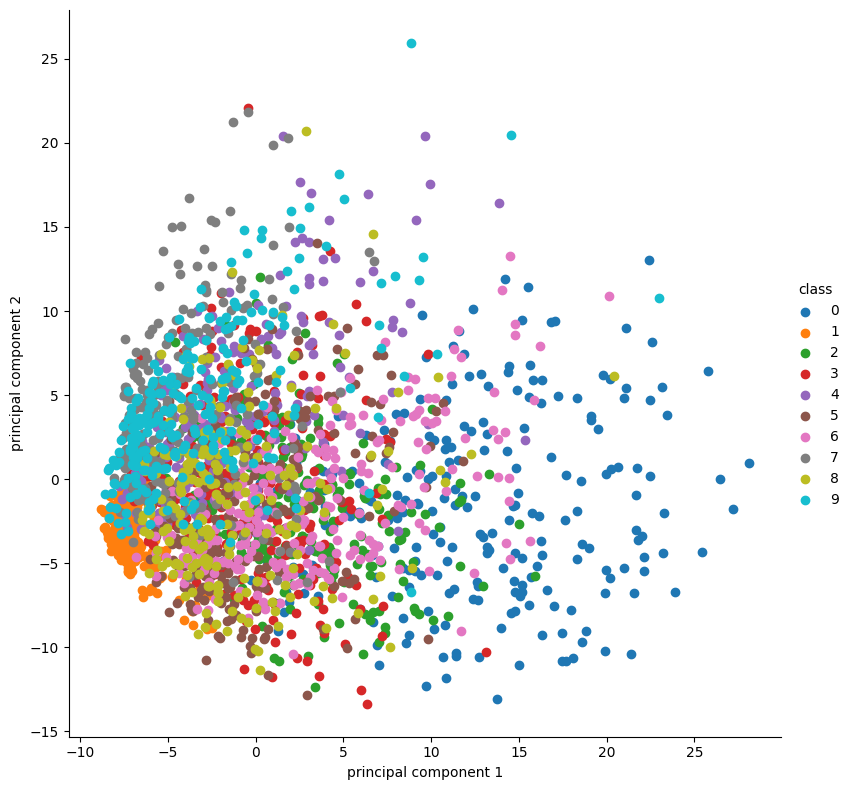

In [47]:
sn.FacetGrid(principal_mnist_df_v1, hue="class", height=8, aspect=1).map(plt.scatter, 'principal component 1', 'principal component 2').add_legend()
plt.show()

## PCA Version 2

In [48]:
pca_mnist_v2 = PCA(n_components=0.99, svd_solver='auto')
pc_mnist_v2 = pca_mnist_v2.fit_transform(X)

In [49]:
columns = ["principal component "+str(i) for i in range(pc_mnist_v2.shape[1])]

In [50]:
principal_mnist_df_v2 = pd.DataFrame(data = pc_mnist_v2, columns = columns)

In [51]:
principal_mnist_df_v2.head()

,principal component 0,principal component 1,principal component 2,principal component 3,principal component 4,principal component 5,principal component 6,principal component 7,principal component 8,principal component 9,...,principal component 404,principal component 405,principal component 406,principal component 407,principal component 408,principal component 409,principal component 410,principal component 411,principal component 412,principal component 413
0,-1.847740,7.818529,-1.796757,-1.338138,2.708256,0.087715,3.296663,-6.420646,-1.686485,0.948052,...,0.052552,-0.067224,-0.134531,-0.075994,0.161140,0.019838,0.020345,-0.017865,-0.141575,-0.135309
1,-5.904872,-6.596829,2.895156,-0.315476,-5.828020,4.507136,1.054268,-4.108848,1.254723,2.954031,...,-0.143420,-0.324648,0.069762,0.314539,-0.167869,-0.420048,-0.070954,-0.016029,0.008313,-0.316469
2,0.871756,5.974424,2.047486,4.551655,1.649135,-6.291584,-0.009685,-1.773639,-3.255887,-3.231143,...,0.038206,0.022896,-0.163229,-0.279458,-0.177618,-0.169481,-0.168977,-0.297101,0.394726,-0.031670
3,-3.257507,-9.183125,-2.886908,4.805792,-4.304106,4.521334,-0.159062,-1.127722,6.624353,-1.375534,...,0.201659,-0.016715,-0.124201,-0.510444,0.472966,0.034421,0.352490,-0.065400,-0.322363,-0.448482
4,-6.818645,7.565856,-3.747505,1.178087,-0.553044,-1.119201,-2.822855,3.972410,-3.658947,6.108631,...,-0.273004,-0.119135,-0.307690,0.174020,0.300129,-0.016146,-0.173003,-0.048543,0.135393,-0.259801


In [52]:
print('\nTotal Explained variability of components = {}'.format(sum(pca_mnist_v2.explained_variance_ratio_)))


Total Explained variability of components = 0.9900421677011764


## Manual Eigen Value Calculation

In [53]:
X = df.drop("class",axis=1).values

In [54]:
X_mean = X.mean(axis=0)
X_std = X.std(axis=0)

For some of the columns STD was zero for normalization was giving an error

`<ipython-input-48-5f9d27351a77>:1: RuntimeWarning: invalid value encountered in divide
  X_Normalized = (X - X.mean(axis=0)) / X.std(axis=0)`

  so change the code to replace **std by 1 if its value is 0**

In [55]:
# Avoid division by zero by replacing zeros in the standard deviation
X_std_safe = np.where(X_std == 0, 1, X_std)


X_standardized = (X - X_mean) / X_std_safe

In [56]:
covariance_matrix = np.cov(X_standardized, ddof = 1, rowvar = False)

In [57]:
covariance_matrix.shape

(784, 784)

In [58]:
eigenvalues, eigenvectors = np.linalg.eig(covariance_matrix)

In [59]:
# np.argsort can only provide lowest to highest; use [::-1] to reverse the list
order_of_importance = np.argsort(eigenvalues)[::-1]

# utilize the sort order to sort eigenvalues and eigenvectors
sorted_eigenvalues = eigenvalues[order_of_importance]
sorted_eigenvectors = eigenvectors[:,order_of_importance] # sort the columns

In [60]:
sorted_eigenvalues.shape

(784,)

In [61]:
explained_variance = sorted_eigenvalues / np.sum(sorted_eigenvalues)

In [62]:
k = 2 # select the number of principal components
reduced_data = np.matmul(X_standardized, sorted_eigenvectors[:,:k]) # transform the original data


In [63]:
total_explained_variance = sum(explained_variance[:k])

In [64]:
for i in range(len(explained_variance[:k])):
  print('Explained variability for  principal component{} = {}'.format(i,explained_variance[:k][i].real))

print('\nTotal Explained variability of components = {}'.format(total_explained_variance.real))


Explained variability for  principal component0 = 0.0665649968634261
Explained variability for  principal component1 = 0.04571012973873859

Total Explained variability of components = 0.11227512660216468


## difference in the explained variance

We can clearly see that PCA1 and Manual calculation of eigen values produced very less Explained Variability as the number of data points increase from 4 to 2500

**Reason**
1. **True data complexity:**
The comprehensive 2500-point dataset likely encompasses more intricate patterns and connections that cannot be adequately represented by merely 2 principal components. Consequently, the explained variance is reduced, albeit to a more realistic level.

2. **Overfitting:**
With only 4 data points and 2 principal components, PCA is essentially overfitting the data. It is capturing noise rather than true underlying patterns, resulting in high explained variance.

3. **Curse of dimensionality:**
As we observe 784 features in high-dimensional spaces, a few points may appear to be close by chance. This phenomenon can also contribute to a high explained variance in the 4-point case.

**Note** :
The sample size of 4 data points is insufficient to accurately represent the true variability and distribution of the entire dataset. Consequently, even though the explained variance is high, its reliability is questionable.







# Problem 2

## a

In [65]:
ten1 = torch.randn(2, 3, requires_grad=True)
ten2 = torch.randn(2, 3, requires_grad=True)

In [66]:
ten3 = torch.cat((ten1, ten2), dim=1)
print("ten3:", ten3)

ten3: tensor([[ 0.5628,  0.8303,  0.6910,  0.0397, -0.4567,  0.8274],
        [-0.0351,  0.3051, -0.2776, -1.0119, -1.9177, -0.5719]],
       grad_fn=<CatBackward0>)


## b





In [67]:
ten3.retain_grad()

In [68]:
f = ten3.pow(2).sum()
print("f:", f)
f.backward()

print("ten3.grad:", ten3.grad)


f: tensor(7.5784, grad_fn=<SumBackward0>)
ten3.grad: tensor([[ 1.1256,  1.6605,  1.3820,  0.0794, -0.9135,  1.6548],
        [-0.0702,  0.6102, -0.5553, -2.0239, -3.8354, -1.1437]])


## C

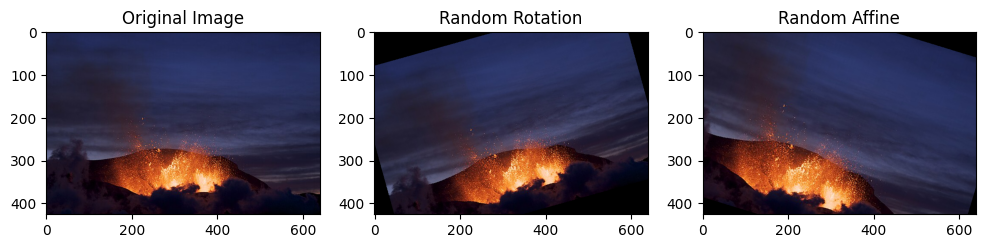

In [70]:
import torchvision.transforms as transforms
import urllib.request

url = 'https://upload.wikimedia.org/wikipedia/commons/thumb/3/37/Fimmvorduhals_2010_03_27_dawn.jpg/640px-Fimmvorduhals_2010_03_27_dawn.jpg'
fpath = 'volcano.jpg'
urllib.request.urlretrieve(url, fpath)

img = Image.open(fpath)


rotate_transform = transforms.RandomRotation(degrees=45)
affine_transform = transforms.RandomAffine(degrees=30, translate=(0.1, 0.1), scale=(0.8, 1.2))

rotated_img = rotate_transform(img)
affine_img = affine_transform(img)

fig, ax = plt.subplots(1, 3, figsize=(12, 4))

ax[0].imshow(img)
ax[0].set_title('Original Image')

ax[1].imshow(rotated_img)
ax[1].set_title('Random Rotation')

ax[2].imshow(affine_img)
ax[2].set_title('Random Affine')

plt.show()
